In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

## reading data

In [49]:
car_data = pd.read_csv('../data/raw/motos_raw_final.csv', index_col=0)
car_data_original = pd.read_csv('../data/raw/motos_raw.csv', index_col=0)
print(car_data.shape)
car_data.head()

(739, 13)


,product,price,link,years,kilometraje,_created,vehicle_make,vehicle_line,id,location_city2,location_city,version,cilindraje
44,Yamaha Nmax 2021 En Perfecto Estado Lista Para...,13200000,https://moto.mercadolibre.com.co/MCO-150210168...,2021,26000,2024-11-08,Yamaha,N-Max,1502101681,Bello,NaN,2021,155.0
181,Yamaha Tenere 250 2014,12900000,https://moto.mercadolibre.com.co/MCO-152480336...,2014,48134,2024-12-29,Yamaha,Tenere,1524803367,Benjamín Herrera,Barrios Unidos,250,250.0
217,Yamaha Fz 250 2023,12300000,https://moto.mercadolibre.com.co/MCO-152477462...,2023,19000,2024-12-29,Yamaha,Fz,1524774627,Centro,Manizales,250,250.0
249,Yamaha Nmax Connect 2023,15500000,https://moto.mercadolibre.com.co/MCO-275470086...,2023,14500,2024-11-28,Yamaha,N-Max,2754700860,El Poblado,Medellín,Connect,155.0
262,Yamaha N-max 2021,13900000,https://moto.mercadolibre.com.co/MCO-151142610...,2021,46000,2024-11-28,Yamaha,N-Max,1511426103,Barrio Colombia,Medellín,2021,155.0


In [50]:
car_data[car_data['vehicle_line']=='N']['price'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: price, dtype: float64

<Axes: >

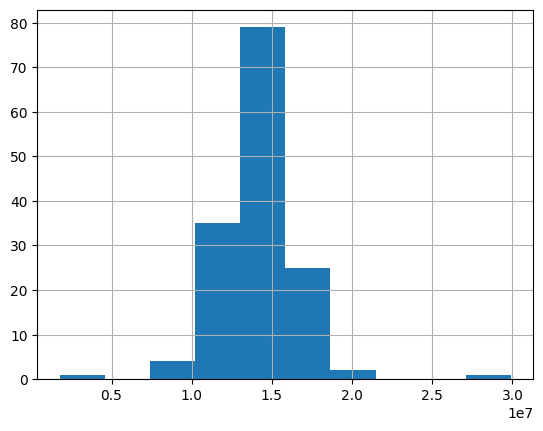

In [51]:
car_data[car_data['vehicle_line']=='N-Max']['price'].hist()

In [52]:
car_data[(car_data['vehicle_line']=='N-Max') & (car_data['price']>25000000)]

,product,price,link,years,kilometraje,_created,vehicle_make,vehicle_line,id,location_city2,location_city,version,cilindraje
13468,Yamaha N -max 300,29900000,https://moto.mercadolibre.com.co/MCO-152206721...,2023,8500,2024-12-22,Yamaha,N-Max,1522067211,Las Palmas,Medellín,-max,300.0


In [53]:
## Agregar el cilindraje al modelo
## En el diccionario imputar no reemplazar el kilometraje

In [54]:
car_data_original[car_data_original['id']==1522067211]

,product,price,link,years,kilometraje,_created,vehicle_make,vehicle_line,id,location_city2,location_city,version
13468,Yamaha N -max 300,29900000,https://moto.mercadolibre.com.co/MCO-152206721...,2023,8500,2024-12-22,Yamaha,N,1522067211,Las Palmas,Medellín,-max 300


In [35]:
car_data_original

,product,price,link,years,kilometraje,_created,vehicle_make,vehicle_line,id,location_city2,location_city,version,cilindraje
44,Yamaha Nmax 2021 En Perfecto Estado Lista Para...,13200000,https://moto.mercadolibre.com.co/MCO-150210168...,2021,26000,2024-11-08,Yamaha,N-Max,1502101681,Bello,NaN,2021,155.0
181,Yamaha Tenere 250 2014,12900000,https://moto.mercadolibre.com.co/MCO-152480336...,2014,48134,2024-12-29,Yamaha,Tenere,1524803367,Benjamín Herrera,Barrios Unidos,250,250.0
217,Yamaha Fz 250 2023,12300000,https://moto.mercadolibre.com.co/MCO-152477462...,2023,19000,2024-12-29,Yamaha,Fz,1524774627,Centro,Manizales,250,250.0
249,Yamaha Nmax Connect 2023,15500000,https://moto.mercadolibre.com.co/MCO-275470086...,2023,14500,2024-11-28,Yamaha,N-Max,2754700860,El Poblado,Medellín,Connect,155.0
262,Yamaha N-max 2021,13900000,https://moto.mercadolibre.com.co/MCO-151142610...,2021,46000,2024-11-28,Yamaha,N-Max,1511426103,Barrio Colombia,Medellín,2021,155.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13320,Yamaha Fz 250,9500000,https://moto.mercadolibre.com.co/MCO-276565780...,2023,35000,2024-12-08,Yamaha,Fz,2765657802,San Cristobal Norte,Usaquén,250,250.0
13379,Yamaha Fz 250 Modelo 2023,12500000,https://moto.mercadolibre.com.co/MCO-276572651...,2023,13000,2024-12-08,Yamaha,Fz,2765726512,Unicentro Cali,Cali,250,250.0
13389,Yamaha Yz 450 F,24000000,https://moto.mercadolibre.com.co/MCO-274288748...,2013,10,2024-11-18,Yamaha,Yz,2742887484,Campo Valdés 1,Medellín,450,450.0
13395,Yamaha Super Teneré 1200,73500000,https://moto.mercadolibre.com.co/MCO-274284150...,2023,27000,2024-11-18,Yamaha,Super-Tenere,2742841508,Medellín,NaN,Teneré,1200.0


In [22]:
car_data_original.head()

,product,price,link,years,kilometraje,_created,vehicle_make,vehicle_line,id,location_city2,location_city,version
2,Bmw R1250 Gs Bmw 1250 2020,84900000,https://moto.mercadolibre.com.co/MCO-273025507...,2020,33000,2024-11-08,Bmw,R1250,2730255076,El Poblado,Medellín,Gs Bmw 1250
4,Yamaha Mt03,15990000,https://moto.mercadolibre.com.co/MCO-273016661...,2018,50500,2024-11-08,Yamaha,Mt03,2730166618,Camino Verde,Envigado,NaN
5,"Benelli Tnt25n, Gris Plata, Modelo 2022",8500000,https://moto.mercadolibre.com.co/MCO-273025641...,2022,15000,2024-11-08,Benelli,"Tnt25n,",2730256416,Las Casitas,Envigado,"Gris Plata, Modelo"
6,"Lista Para Traspaso, Mofle De Dr Y Se Entrega ...",15600000,https://moto.mercadolibre.com.co/MCO-273020911...,2004,87000,2024-11-08,Lista,Para,2730209118,Bello,NaN,"Traspaso, Mofle De"
13,Yamaha Raptor 350,18900000,https://moto.mercadolibre.com.co/MCO-273016871...,2008,26000,2024-11-08,Yamaha,Raptor,2730168710,El Poblado,Medellín,350


In [47]:
car_data['product'] = car_data['product'].str.replace('Royal Enfield', 'Royal-Enfield')
car_data['product'] = car_data['product'].str.replace('Harley Davidson', 'Harley-Davidson')
car_data['product'] = car_data['product'].str.replace('Mt 15', 'Mt-15')
car_data['product'] = car_data['product'].str.replace('Mt15', 'Mt-15')
car_data['product'] = car_data['product'].str.replace('Mt 09', 'Mt-09')
car_data['product'] = car_data['product'].str.replace('Mt09', 'Mt-09')
car_data['product'] = car_data['product'].str.replace('Mt 07', 'Mt-07')
car_data['product'] = car_data['product'].str.replace('Mt 03', 'Mt-03')
car_data['product'] = car_data['product'].str.replace('Mt03', 'Mt-03')
car_data['product'] = car_data['product'].str.replace('Fz 25', 'Fz-25')
car_data['product'] = car_data['product'].str.replace('Fz 2.5', 'Fz-25')
car_data['product'] = car_data['product'].str.replace('Fz 2.0', 'Fz-2.0')
car_data['product'] = car_data['product'].str.replace('Fz 16', 'Fz-16')
car_data['product'] = car_data['product'].str.replace('Fz25', 'Fz-25')
def get_info_from_name(data):
    product_serie = data['product'].str.split(' ')
    data['vehicle_make'] = product_serie.str[0].str.strip()
    data['vehicle_line'] = product_serie.str[1].str.strip()
    data['version'] = product_serie.str[2].str.strip()
    return data
car_data = get_info_from_name(car_data)

In [48]:
car_data[car_data['vehicle_line']=='Fz-2.0']

,product,price,link,years,kilometraje,_created,vehicle_make,vehicle_line,id,location_city2,location_city,version
1023,Yamaha Fz-2.0 2024,10000000,https://moto.mercadolibre.com.co/MCO-275900479...,2024,4800,2024-12-03,Yamaha,Fz-2.0,2759004798,San Humberto,Soacha,2024
1051,Yamaha Fz-2.0,6500000,https://moto.mercadolibre.com.co/MCO-275896641...,2017,70000,2024-12-03,Yamaha,Fz-2.0,2758966414,Ibagué,NaN,NaN
1273,Yamaha Fz-2.0 Full Inyection,7500000,https://moto.mercadolibre.com.co/MCO-150984618...,2020,49923,2024-11-25,Yamaha,Fz-2.0,1509846185,Las Flores,Suba,Full
1339,Yamaha Fz-2.0,9300000,https://moto.mercadolibre.com.co/MCO-150399194...,2023,18000,2024-11-12,Yamaha,Fz-2.0,1503991943,Laureles,Medellín,NaN
1460,Yamaha Fz-2.0 Mod 2018,5500000,https://moto.mercadolibre.com.co/MCO-150380068...,2018,125000,2024-11-12,Yamaha,Fz-2.0,1503800681,Versalles,Palmira,Mod
2031,Yamaha Fz-2.0 Edición Especial Llantas Nuevas ...,8500000,https://moto.mercadolibre.com.co/MCO-281148175...,2024,29000,2025-02-07,Yamaha,Fz-2.0,2811481752,Cúcuta,NaN,Edición
2888,Yamaha Fz-2.0 Full Inyección,9000000,https://moto.mercadolibre.com.co/MCO-152071317...,2023,8600,2024-12-19,Yamaha,Fz-2.0,1520713177,Ubaté,NaN,Full
3037,Yamaha Fz-2.0,6000000,https://moto.mercadolibre.com.co/MCO-281508054...,2024,7000,2025-02-13,Yamaha,Fz-2.0,2815080546,Neiva,NaN,NaN
4093,Yamaha Fz-2.0 Modelo 2022 Con 28.000km Buen Es...,8000000,https://moto.mercadolibre.com.co/MCO-149747610...,2022,28000,2024-11-08 01:26:01,Yamaha,Fz-2.0,1497476101,Roma,Kennedy,Modelo
5289,Yamaha Fz-2.0,6000000,https://moto.mercadolibre.com.co/MCO-149285232...,2019,101200,2024-11-08 01:26:43,Yamaha,Fz-2.0,1492852325,Diana Turbay,Rafael Uribe Uribe,NaN


In [49]:
drop_makes = ['Soat', 'Vendo', 'Se', 'Moto','Motocicleta', 'Cuatrimoto']
car_data = car_data[~car_data['vehicle_make'].isin(drop_makes)]
car_data['brand-line'] = car_data['vehicle_make'] + car_data['vehicle_line']
lineas = car_data['vehicle_make'].value_counts()
linead_filter = lineas[lineas>50].index
car_data  = car_data[car_data['vehicle_make'].isin(linead_filter)]

In [50]:
drop_makes = ['-']
car_data = car_data[~car_data['vehicle_line'].isin(drop_makes)]
lineas = car_data['vehicle_line'].value_counts()
linead_filter = lineas[lineas>8].index
car_data  = car_data[car_data['vehicle_line'].isin(linead_filter)]

In [51]:
car_data['vehicle_line'].value_counts().index.values

array(['Gixxer', 'Pulsar', 'Ns', 'Cb', 'R', 'Apache', 'F', 'Duke', '250',
       '400', 'Xtz', 'Nmax', '200', 'Versys', 'Cr4', 'Bws', 'Mt-09',
       'R15', 'Fz', 'Dominar', '', '390', 'Nkd', 'Fz-250', 'Gs', 'G',
       'Dynamic', 'Himalayan', 'Trk', 'Ttr', 'Multistrada', 'Ninja',
       'Agility', 'Hunk', 'Xre', '180', 'Black', 'Fz-25', 'Vstrom',
       'Navi', 'Svartpilen', 'Mrx', 'Mt-03', '150', 'Switch', 'Bomber',
       'Mt-15', 'Raider', 'Xpulse', 'Xr', 'Scrambler', 'R1200gs', 'Pcx',
       'Dueño,', '160', 'Rtr', 'Tnt', '180s', 'X', 'Life', 'V-strom',
       'F700gs', 'Fi', 'Tt', 'Fazer', 'Szr', 'R1250gs', '125', 'Gsx',
       'R1200', 'Monster', 'Dio', 'Dr', 'Hypermotard', 'Fz-2.0', 'Dt',
       'N-max', 'F850gs', 'Jet', '890', 'Adventure', 'Super', 'Xt',
       'Boxer', 'F750gs', 'Cbf', 'Discover', 'Negro', 'R3', 'Er6n',
       'Twist', 'Aerox', 'F900r', 'Estado,', 'G310gs', 'Meteor', 'Flex',
       'Xre300', 'Nitro', 'Xblade', 'Estado', 'Gn', 'Classic', '1290',
       'F800',

In [46]:
import pandas as pd
import re
def extraer_cilindraje(descripciones):
    """
    Extrae el cilindraje (CC) de una lista de descripciones de motocicletas.

    Args:
        descripciones (list): Lista de descripciones de motocicletas.

    Returns:
        list: Lista de cilindrajes extraídos como enteros.
    """
    cilindrajes = []
    for descripcion in descripciones:
        # Buscar un número de 2 a 4 dígitos seguido de "cc" o aislado, evitando años comunes (1900-2024)
        matches = re.findall(r'\b(?:[a-zA-Z]*)(\d{2,4})(?:[a-zA-Z]*)(?:\s?cc)?\b', descripcion, re.IGNORECASE)
        
        if matches:
            # Convertir los resultados a enteros
            posibles_cilindrajes = [int(m) for m in matches if not (int(m) < 100 or int(m) >= 1900)]
            if posibles_cilindrajes:
                # Si hay candidatos válidos, tomar el primero
                cilindrajes.append(posibles_cilindrajes[0])
            else:
                # Si todos los números encontrados parecen ser años, devolver None
                cilindrajes.append(None)
        else:
            cilindrajes.append(None)  # En caso de no encontrar ningún número
    return cilindrajes

    

In [47]:
car_data['cilindraje'] = extraer_cilindraje(car_data['product'])

In [48]:
car_data[car_data['id']==1522067211]

,product,price,link,years,kilometraje,_created,vehicle_make,vehicle_line,id,location_city2,location_city,version,cilindraje
13468,Yamaha N -max 300,29900000,https://moto.mercadolibre.com.co/MCO-152206721...,2023,8500,2024-12-22,Yamaha,N-Max,1522067211,Las Palmas,Medellín,-max,300.0


In [55]:
car_data['cilindraje'].unique().tolist()

[1250.0,
 nan,
 750.0,
 155.0,
 500.0,
 200.0,
 190.0,
 160.0,
 300.0,
 890.0,
 790.0,
 390.0,
 850.0,
 650.0,
 110.0,
 250.0,
 180.0,
 125.0,
 400.0,
 150.0,
 350.0,
 1200.0,
 600.0,
 310.0,
 450.0,
 502.0,
 800.0,
 883.0,
 100.0,
 115.0,
 900.0,
 1300.0,
 701.0,
 1260.0,
 1100.0,
 950.0,
 1000.0,
 821.0,
 700.0,
 660.0,
 411.0,
 162.0,
 690.0,
 937.0,
 1290.0,
 251.0,
 719.0,
 1050.0,
 135.0,
 320.0,
 171.0,
 321.0,
 391.0,
 175.0,
 535.0,
 302.0,
 154.0,
 401.0,
 260.0,
 698.0,
 939.0,
 225.0,
 797.0,
 170.0,
 220.0,
 151.0,
 153.0,
 803.0,
 124.0,
 954.0,
 249.0,
 788.0,
 1150.0,
 990.0,
 1090.0,
 486.0,
 955.0,
 1600.0,
 201.0,
 1158.0,
 847.0,
 730.0]

In [56]:
car_data['cilindraje'] = np.where(car_data['brand-line']=='VictoryBlack', 171, car_data['cilindraje'])
car_data['cilindraje'] = np.where(car_data['brand-line']=='YamahaR15', 155, car_data['cilindraje'])

car_data['cilindraje'] = np.where(car_data['brand-line']=='YamahaNmax', 155, car_data['cilindraje'])
car_data['cilindraje'] = np.where(car_data['brand-line']=='HondaNavi', 110, car_data['cilindraje'])
car_data['cilindraje'] = np.where(car_data['brand-line']=='YamahaBws', 115, car_data['cilindraje'])
car_data['cilindraje'] = np.where(car_data['brand-line']=='YamahaMt-03', 321, car_data['cilindraje'])
car_data['cilindraje'] = np.where(car_data['brand-line']=='YamahaMt-09', 890, car_data['cilindraje'])
car_data['cilindraje'] = np.where(car_data['brand-line']=='YamahaMt-07', 689, car_data['cilindraje'])
car_data['cilindraje'] = np.where(car_data['brand-line']=='YamahaMt-15', 155, car_data['cilindraje'])
car_data['cilindraje'] = np.where(car_data['brand-line']=='AktNkd', 125, car_data['cilindraje'])
car_data['cilindraje'] = np.where(car_data['brand-line']=='AktNkd', 125, car_data['cilindraje'])

In [57]:
car_data

,product,price,link,years,kilometraje,_created,vehicle_make,vehicle_line,id,location_city2,location_city,version,brand-line,cilindraje
2,Bmw R1250 Gs Bmw 1250 2020,84900000,https://moto.mercadolibre.com.co/MCO-273025507...,2020,33000,2024-11-08,Bmw,R1250,2730255076,El Poblado,Medellín,Gs,BmwR1250,1250.0
4,Yamaha Mt-03,15990000,https://moto.mercadolibre.com.co/MCO-273016661...,2018,50500,2024-11-08,Yamaha,Mt-03,2730166618,Camino Verde,Envigado,NaN,YamahaMt-03,321.0
18,Honda Xadv 750,58000000,https://moto.mercadolibre.com.co/MCO-273027103...,2022,22000,2024-11-08,Honda,Xadv,2730271036,El Poblado,Medellín,750,HondaXadv,750.0
20,Yamaha N Max 155,18500000,https://moto.mercadolibre.com.co/MCO-273027117...,2025,0,2024-11-08,Yamaha,N,2730271178,El Poblado,Medellín,Max,YamahaN,155.0
26,Honda Cb500x 2022,39900000,https://moto.mercadolibre.com.co/MCO-273020627...,2022,19500,2024-11-08,Honda,Cb500x,2730206278,Girardot,Medellín,2022,HondaCb500x,500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13500,Yamaha 2021 Bwis-yw25xfi,10950000,https://moto.mercadolibre.com.co/MCO-150668387...,2021,39000,2024-11-18,Yamaha,2021,1506683875,Corregimiento Mulaló,Yumbo,Bwis-yw25xfi,Yamaha2021,NaN
13501,Apache 160 4v,7000000,https://moto.mercadolibre.com.co/MCO-150667125...,2022,10870,2024-11-18,Apache,160,1506671255,La Hacienda,Cali,4v,Apache160,160.0
13503,Akt Tt Ds Rally,8000000,https://moto.mercadolibre.com.co/MCO-150674187...,2024,22000,2024-11-18,Akt,Tt,1506741873,Pacará,Cali,Ds,AktTt,NaN
13505,Akt Nkd 124,3800000,https://moto.mercadolibre.com.co/MCO-150665526...,2021,23000,2024-11-18,Akt,Nkd,1506655263,Andalucía,NaN,124,AktNkd,125.0


In [58]:
car_data[(car_data['cilindraje'].isna()) & (car_data['brand-line']=='YamahaFz-2.0')]

,product,price,link,years,kilometraje,_created,vehicle_make,vehicle_line,id,location_city2,location_city,version,brand-line,cilindraje
1023,Yamaha Fz-2.0 2024,10000000,https://moto.mercadolibre.com.co/MCO-275900479...,2024,4800,2024-12-03,Yamaha,Fz-2.0,2759004798,San Humberto,Soacha,2024,YamahaFz-2.0,NaN
1051,Yamaha Fz-2.0,6500000,https://moto.mercadolibre.com.co/MCO-275896641...,2017,70000,2024-12-03,Yamaha,Fz-2.0,2758966414,Ibagué,NaN,NaN,YamahaFz-2.0,NaN
1273,Yamaha Fz-2.0 Full Inyection,7500000,https://moto.mercadolibre.com.co/MCO-150984618...,2020,49923,2024-11-25,Yamaha,Fz-2.0,1509846185,Las Flores,Suba,Full,YamahaFz-2.0,NaN
1339,Yamaha Fz-2.0,9300000,https://moto.mercadolibre.com.co/MCO-150399194...,2023,18000,2024-11-12,Yamaha,Fz-2.0,1503991943,Laureles,Medellín,NaN,YamahaFz-2.0,NaN
1460,Yamaha Fz-2.0 Mod 2018,5500000,https://moto.mercadolibre.com.co/MCO-150380068...,2018,125000,2024-11-12,Yamaha,Fz-2.0,1503800681,Versalles,Palmira,Mod,YamahaFz-2.0,NaN
2031,Yamaha Fz-2.0 Edición Especial Llantas Nuevas ...,8500000,https://moto.mercadolibre.com.co/MCO-281148175...,2024,29000,2025-02-07,Yamaha,Fz-2.0,2811481752,Cúcuta,NaN,Edición,YamahaFz-2.0,NaN
2888,Yamaha Fz-2.0 Full Inyección,9000000,https://moto.mercadolibre.com.co/MCO-152071317...,2023,8600,2024-12-19,Yamaha,Fz-2.0,1520713177,Ubaté,NaN,Full,YamahaFz-2.0,NaN
3037,Yamaha Fz-2.0,6000000,https://moto.mercadolibre.com.co/MCO-281508054...,2024,7000,2025-02-13,Yamaha,Fz-2.0,2815080546,Neiva,NaN,NaN,YamahaFz-2.0,NaN
4093,Yamaha Fz-2.0 Modelo 2022 Con 28.000km Buen Es...,8000000,https://moto.mercadolibre.com.co/MCO-149747610...,2022,28000,2024-11-08 01:26:01,Yamaha,Fz-2.0,1497476101,Roma,Kennedy,Modelo,YamahaFz-2.0,NaN
5289,Yamaha Fz-2.0,6000000,https://moto.mercadolibre.com.co/MCO-149285232...,2019,101200,2024-11-08 01:26:43,Yamaha,Fz-2.0,1492852325,Diana Turbay,Rafael Uribe Uribe,NaN,YamahaFz-2.0,NaN


In [59]:
car_data[car_data['cilindraje'].isna()]['brand-line'].value_counts()

brand-line
YamahaFz-25               46
ÚnicoDueño,               36
Royal-EnfieldHimalayan    29
AktDynamic                29
BwsFi                     28
                          ..
Ducati2021                 1
ApacheNegra                1
AutecoLife                 1
HeroXpulse                 1
Yamaha2021                 1
Name: count, Length: 177, dtype: int64

In [60]:
car_data[car_data['cilindraje'].isna()]['link'].values

array(['https://moto.mercadolibre.com.co/MCO-1502064555-yamaha-szr-gris-modelo-2024-_JM#polycard_client=search-nordic&position=43&search_layout=grid&type=item&tracking_id=49856736-75c7-4e1a-98b7-1019d0b40afa',
       'https://moto.mercadolibre.com.co/MCO-1524776503-ducati-scrambler-urban-_JM#polycard_client=search-nordic&position=3&search_layout=grid&type=item&tracking_id=8cd938d3-8ab6-4138-8ab3-bbf887b321cf',
       'https://moto.mercadolibre.com.co/MCO-2785983018-benelli-tnt-25n-_JM#polycard_client=search-nordic&position=12&search_layout=grid&type=item&tracking_id=8cd938d3-8ab6-4138-8ab3-bbf887b321cf',
       'https://moto.mercadolibre.com.co/MCO-1524843251-suzuki-gixxer-_JM#polycard_client=search-nordic&position=7&search_layout=grid&type=item&tracking_id=c3c49bcf-3847-4047-8ce6-7a69813943e3',
       'https://moto.mercadolibre.com.co/MCO-2785598834-tvs-apache-fi-4v-2025-3000-kms-_JM#polycard_client=search-nordic&position=11&search_layout=grid&type=item&tracking_id=c3c49bcf-3847-4047-

In [61]:
car_data[car_data['cilindraje']==15]

,product,price,link,years,kilometraje,_created,vehicle_make,vehicle_line,id,location_city2,location_city,version,brand-line,cilindraje


In [62]:
car_data['version'].value_counts()

version
125             482
150             430
200             311
250             287
160             136
               ... 
2024.             1
1290              1
F650gs            1
Tvs               1
Bwis-yw25xfi      1
Name: count, Length: 716, dtype: int64

## Data Fasecolda

In [128]:
yamaha = car_data[car_data['vehicle_make']=='Yamaha']

## NMAX process

In [129]:
max_models = ['Nmax', 'N-max', 'N']
yamaha[yamaha['vehicle_line'].isin(max_models)]
yamaha['vehicle_line'] = np.where(yamaha['vehicle_line'].isin(max_models), 'N-Max', yamaha['vehicle_line'])
yamaha['cilindraje'] = np.where(yamaha['vehicle_line']=='N-Max', 155, yamaha['cilindraje'])

/tmp/ipykernel_13228/900168583.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yamaha['vehicle_line'] = np.where(yamaha['vehicle_line'].isin(max_models), 'N-Max', yamaha['vehicle_line'])
/tmp/ipykernel_13228/900168583.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yamaha['cilindraje'] = np.where(yamaha['vehicle_line']=='N-Max', 155, yamaha['cilindraje'])


# BWS

In [130]:

bws_models = ['Bws','Bwis']
yamaha[yamaha['vehicle_line'].isin(bws_models)]
yamaha['vehicle_line'] = np.where(yamaha['vehicle_line'].isin(bws_models), 'BWS', yamaha['vehicle_line'])

/tmp/ipykernel_13228/4127585775.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yamaha['vehicle_line'] = np.where(yamaha['vehicle_line'].isin(bws_models), 'BWS', yamaha['vehicle_line'])


# FZ-25

In [131]:
yamaha['cilindraje'] = np.where(yamaha['vehicle_line']=='Fz-25', 250, yamaha['cilindraje'])

/tmp/ipykernel_13228/1354281720.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yamaha['cilindraje'] = np.where(yamaha['vehicle_line']=='Fz-25', 250, yamaha['cilindraje'])


## FZ 2.0

In [132]:
yamaha['cilindraje'] = np.where(yamaha['vehicle_line']=='Fz-2.0', 150, yamaha['cilindraje'])

/tmp/ipykernel_13228/2394328507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yamaha['cilindraje'] = np.where(yamaha['vehicle_line']=='Fz-2.0', 150, yamaha['cilindraje'])


# Yamaha R3

In [ ]:
yamaha['cilindraje'] = np.where(yamaha['vehicle_line']=='R3', 320, yamaha['cilindraje'])

/tmp/ipykernel_13228/4000747529.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yamaha['cilindraje'] = np.where(yamaha['vehicle_line']=='R3', 320, yamaha['cilindraje'])


# AEROX 155

In [134]:
yamaha['cilindraje'] = np.where(yamaha['vehicle_line']=='Aerox', 155, yamaha['cilindraje'])

/tmp/ipykernel_13228/2966286642.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yamaha['cilindraje'] = np.where(yamaha['vehicle_line']=='Aerox', 155, yamaha['cilindraje'])


In [153]:
xmax = ['Xmax', 'X-max', 'X']
yamaha['vehicle_line'] = np.where(yamaha['vehicle_line'].isin(xmax), "X-Max", yamaha['vehicle_line'])
yamaha['cilindraje'] = np.where(yamaha['vehicle_line']=='X-max', 300, yamaha['cilindraje'])

/tmp/ipykernel_13228/853283139.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yamaha['vehicle_line'] = np.where(yamaha['vehicle_line'].isin(xmax), "X-Max", yamaha['vehicle_line'])
/tmp/ipykernel_13228/853283139.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yamaha['cilindraje'] = np.where(yamaha['vehicle_line']=='X-max', 300, yamaha['cilindraje'])


In [154]:
yamaha['cilindraje'] = np.where(yamaha['vehicle_line']=='Ycz', 110, yamaha['cilindraje'])

/tmp/ipykernel_13228/1876334929.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yamaha['cilindraje'] = np.where(yamaha['vehicle_line']=='Ycz', 110, yamaha['cilindraje'])


In [155]:
yamaha['vehicle_line'] = np.where(yamaha['vehicle_line']=='Super', 'Super-Tenere', yamaha['vehicle_line'])
yamaha['cilindraje'] = np.where(yamaha['vehicle_line']=='Super', 1200, yamaha['cilindraje'])

/tmp/ipykernel_13228/169891516.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yamaha['vehicle_line'] = np.where(yamaha['vehicle_line']=='Super', 'Super-Tenere', yamaha['vehicle_line'])
/tmp/ipykernel_13228/169891516.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yamaha['cilindraje'] = np.where(yamaha['vehicle_line']=='Super', 1200, yamaha['cilindraje'])


In [156]:
yamaha['cilindraje'] = np.where(yamaha['cilindraje']=='R1', 1000, yamaha['cilindraje'])

/tmp/ipykernel_13228/249079673.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yamaha['cilindraje'] = np.where(yamaha['cilindraje']=='R1', 1000, yamaha['cilindraje'])


In [157]:
yamaha['vehicle_line'].value_counts()

vehicle_line
N-Max           142
Xtz             104
BWS              97
Mt-09            78
R15              76
Fz               75
Fz-250           68
Fz-25            52
Mt-03            47
Mt-15            42
X-Max            37
Fazer            31
Szr              30
Dt               27
Fz-2.0           26
R3               23
Aerox            22
Xt               22
Ycz              16
Super-Tenere     15
                 14
Tenere           14
R1               13
Tracer           12
Ybr              12
Yz               11
Libero           10
Crypton           9
Fz-16             9
R                 8
150               5
Cb                1
Connected         1
160               1
V                 1
Modelo            1
155               1
2021              1
Name: count, dtype: int64

In [158]:
yamaha['cilindraje'] = np.where(yamaha['cilindraje']=='Tracer', 900, yamaha['cilindraje'])

/tmp/ipykernel_13228/3256867136.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yamaha['cilindraje'] = np.where(yamaha['cilindraje']=='Tracer', 900, yamaha['cilindraje'])


In [159]:
yamaha[yamaha['vehicle_line']=='X-Max']

,product,price,link,years,kilometraje,_created,vehicle_make,vehicle_line,id,location_city2,location_city,version,brand-line,cilindraje
476,Yamaha X Max 300,29500000,https://moto.mercadolibre.com.co/MCO-153693939...,2023,14000,2025-02-04,Yamaha,X-Max,1536939397,El Cortijo,Engativa,Max,YamahaX,300.0
641,Yamaha Xmax 300 En Perfecto Estado Como Nueva!!!,26000000,https://moto.mercadolibre.com.co/MCO-274651862...,2020,24000,2024-11-21,Yamaha,X-Max,2746518624,Castilla,Kennedy,300,YamahaXmax,300.0
766,Yamaha X Max 300,27800000,https://moto.mercadolibre.com.co/MCO-276453989...,2022,4746,2024-12-07,Yamaha,X-Max,2764539896,San Diego,Medellín,Max,YamahaX,300.0
1805,Yamaha Xmax 300,22900000,https://moto.mercadolibre.com.co/MCO-274178093...,2020,41000,2024-11-16,Yamaha,X-Max,2741780938,El Poblado,Medellín,300,YamahaXmax,300.0
1928,Yamaha X-max 300,30500000,https://moto.mercadolibre.com.co/MCO-281146908...,2023,4800,2025-02-07,Yamaha,X-Max,2811469088,El Poblado,Medellín,300,YamahaX-max,300.0
2475,Yamaha Xmax 300,27000000,https://moto.mercadolibre.com.co/MCO-281052274...,2022,22300,2025-02-05,Yamaha,X-Max,2810522744,El Poblado,Medellín,300,YamahaXmax,300.0
2506,Yamaha X-max 300 2019,23000000,https://moto.mercadolibre.com.co/MCO-281055140...,2019,50500,2025-02-05,Yamaha,X-Max,2810551408,Zona Franca,Fontibón,300,YamahaX-max,300.0
3431,Yamaha Xmax 300 Mt 300cc Abs,27200000,https://moto.mercadolibre.com.co/MCO-149876954...,2022,20200,2024-11-08 01:25:34,Yamaha,X-Max,1498769549,El Salitre,Teusaquillo,300,YamahaXmax,300.0
4119,Yamaha Xmax 300,21500000,https://moto.mercadolibre.com.co/MCO-270504249...,2020,27500,2024-11-08 01:26:04,Yamaha,X-Max,2705042494,Usaquén,Usaquén,300,YamahaXmax,300.0
4172,Yamaha X Max 300,24000000,https://moto.mercadolibre.com.co/MCO-147055301...,2020,16100,2024-11-08 01:26:06,Yamaha,X-Max,1470553015,Santa Barbara Oriental,Usaquén,Max,YamahaX,300.0


In [160]:
yamaha['vehicle_line'].value_counts()

vehicle_line
N-Max           142
Xtz             104
BWS              97
Mt-09            78
R15              76
Fz               75
Fz-250           68
Fz-25            52
Mt-03            47
Mt-15            42
X-Max            37
Fazer            31
Szr              30
Dt               27
Fz-2.0           26
R3               23
Aerox            22
Xt               22
Ycz              16
Super-Tenere     15
                 14
Tenere           14
R1               13
Tracer           12
Ybr              12
Yz               11
Libero           10
Crypton           9
Fz-16             9
R                 8
150               5
Cb                1
Connected         1
160               1
V                 1
Modelo            1
155               1
2021              1
Name: count, dtype: int64

In [161]:
yamaha[yamaha['vehicle_line']=='X']

,product,price,link,years,kilometraje,_created,vehicle_make,vehicle_line,id,location_city2,location_city,version,brand-line,cilindraje


In [181]:
lineas = yamaha['vehicle_line'].value_counts()
linead_filter = lineas[lineas>10].index
yamaha  = yamaha[(yamaha['vehicle_line'].isin(linead_filter)) & (yamaha['vehicle_line']!='') & (yamaha['cilindraje'].notna()) & (yamaha['kilometraje']>0)]

In [182]:
yamaha['vehicle_line'].value_counts()

vehicle_line
N-Max           140
Xtz              93
BWS              87
Mt-09            78
R15              76
Fz-250           67
Fz               66
Fz-25            52
Mt-03            47
Mt-15            40
X-Max            31
Fz-2.0           26
Dt               24
Fazer            24
R3               23
Xt               22
Szr              20
Aerox            19
Tenere           14
Ycz              14
Super-Tenere     13
Ybr              10
Name: count, dtype: int64

In [186]:
yamaha.to_csv('../data/raw/motos_raw.csv')